In [1]:
## End to End NLP project on Emotion detection in Text (classifier)


In [2]:
import pandas as pd
import numpy as np


In [3]:
# Load data Viz pkgs
import seaborn as sns

In [4]:
!pip install neattext

In [5]:
# Load Text cleaning Pkgs
import neattext.functions as nfx

In [18]:
# Load ML Pkgs
# Estimators
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

# Transformers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [7]:
# Load Dataset
df = pd.read_csv("data/emotion_dataset_raw.csv", sep = ',')

In [8]:
df['Emotion']

0         neutral
1             joy
2         sadness
3             joy
4             joy
           ...   
34787    surprise
34788         joy
34789       anger
34790        fear
34791     sadness
Name: Emotion, Length: 34792, dtype: object

In [9]:
# Value Counts
df['Emotion'].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

<AxesSubplot:xlabel='Emotion', ylabel='count'>

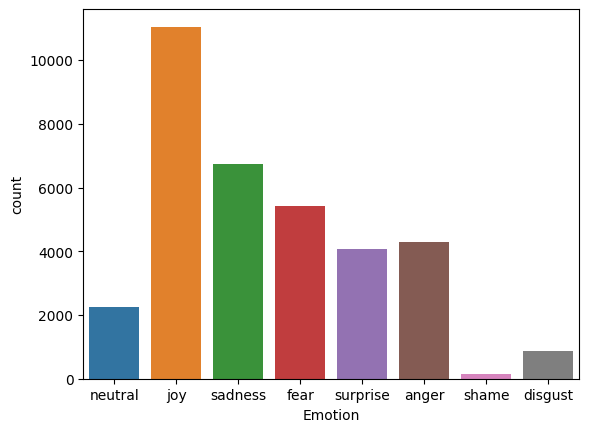

In [10]:
# Plot
sns.countplot(x='Emotion',data=df)

In [11]:
# User handles
df['Clean_Text'] = df['Text'].apply(nfx.remove_userhandles)

In [12]:
# Stopwords
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)

In [13]:
# Features & Labels
Xfeatures = df['Clean_Text']
ylabels = df['Emotion']

In [14]:
#  Split Data
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=42)

In [15]:
# Build Pipeline
from sklearn.pipeline import Pipeline

In [33]:
# LogisticRegression Pipeline
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression(max_iter=1000))])


In [34]:

# Train and Fit Data
pipe_lr.fit(x_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()),
                ('lr', LogisticRegression(max_iter=1000))])

In [35]:
# Check Accuracy
pipe_lr.score(x_test,y_test)

0.6209043878137575

In [36]:
# Make A Prediction
ex1 = "This book was so interesting it made me happy"

In [37]:
pipe_lr.predict([ex1])


array(['joy'], dtype=object)

In [38]:

# Prediction Prob
pipe_lr.predict_proba([ex1])

array([[1.64473179e-03, 7.03805328e-03, 6.98941065e-03, 9.43271878e-01,
        1.03258221e-04, 2.63063041e-02, 6.82705309e-05, 1.45780930e-02]])

In [39]:
# To Know the classes
pipe_lr.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype=object)

In [40]:
# Save Model & Pipeline
import joblib
pipeline_file = open("emotion_classifier_pipe_lr_03_june_2021.pkl","wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()